## Exponential Moving Average (EMA) crossover approach for equity markets.
1. Problem Definition
Goal: Develop a trend-following strategy for equity markets using an EMA crossover method.

2. Data Collection
Data: We will use historical daily closing prices of S&P 500 stocks. For this example, let's focus on a single stock, e.g., Apple Inc. (AAPL), over the past 10 years.

3. Exploratory Data Analysis (EDA)
We'll calculate and visualize moving averages, momentum indicators, and price distributions.

4. Model Development
We will implement an EMA crossover strategy:

Short-term EMA: 12-day EMA
Long-term EMA: 26-day EMA
Buy Signal: When the 12-day EMA crosses above the 26-day EMA
Sell Signal: When the 12-day EMA crosses below the 26-day EMA
5. Backtesting
We will run the strategy on historical data to evaluate its performance using metrics such as Sharpe ratio, maximum drawdown, and cumulative returns.

6. Implementation
We will simulate the execution logic based on EMA crossover signals.

7. Risk Management
We'll set up stop-loss and position sizing rules:

Stop-loss: 2% below the entry price
Position size: 1% of the portfolio per trade
8. Monitoring
We'll monitor the strategy performance and adjust parameters if necessary.

9. Continuous Improvement
We'll periodically review strategy performance and incorporate new data or indicators.

[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-b81a6cb4d6ba>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ShortEMA'] = data['Close'].ewm(span=12, adjust=False).mean()
<ipython-input-1-b81a6cb4d6ba>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LongEMA'] = data['Close'].ewm(span=26, adjust=False).mean()
<ipython-input-1-b81a6cb4d6ba>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

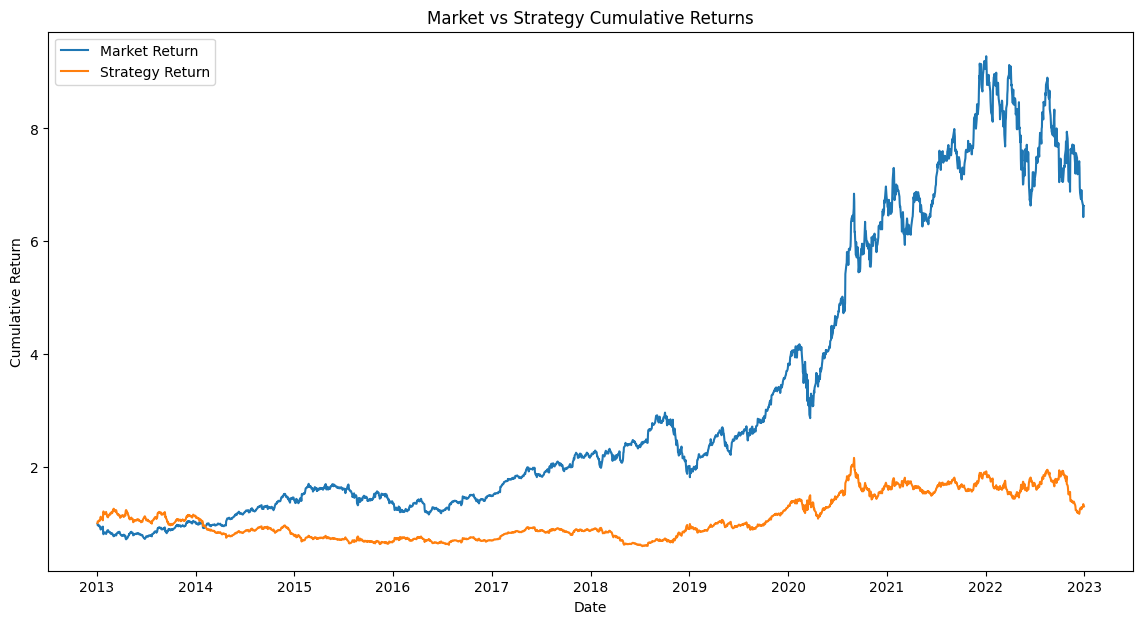

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Data Collection
ticker = "AAPL"
start_date = "2013-01-01"
end_date = "2023-01-01"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)
data = data[['Close']]

# Data Preprocessing
data['ShortEMA'] = data['Close'].ewm(span=12, adjust=False).mean()
data['LongEMA'] = data['Close'].ewm(span=26, adjust=False).mean()

# Generate Buy/Sell Signals
data['Signal'] = 0
data.loc[data['ShortEMA'] > data['LongEMA'], 'Signal'] = 1
data.loc[data['ShortEMA'] < data['LongEMA'], 'Signal'] = -1

# Calculate Returns
data['Return'] = data['Close'].pct_change()
data['StrategyReturn'] = data['Return'] * data['Signal'].shift(1)

# Calculate cumulative returns
data['CumulativeMarketReturn'] = (1 + data['Return']).cumprod()
data['CumulativeStrategyReturn'] = (1 + data['StrategyReturn']).cumprod()

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data['CumulativeMarketReturn'], label='Market Return')
plt.plot(data['CumulativeStrategyReturn'], label='Strategy Return')
plt.title('Market vs Strategy Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


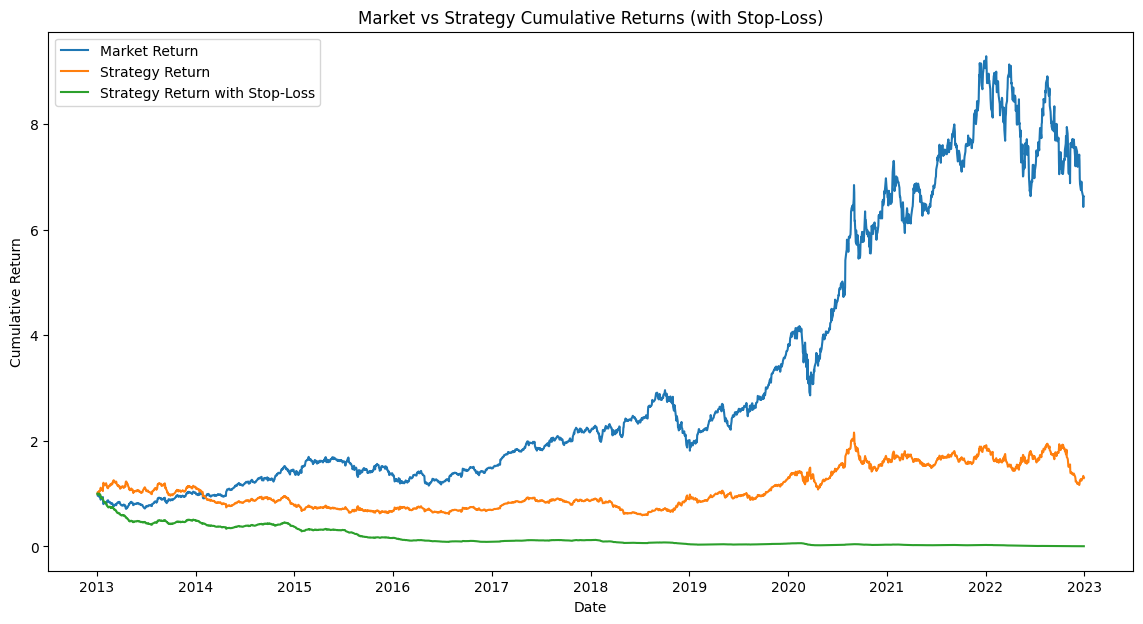

Sharpe Ratio: 0.23
Max Drawdown: 0.99
Sharpe Ratio with Stop-Loss: -2.13
Max Drawdown with Stop-Loss: 1.00


In [4]:
# Performance Metrics
sharpe_ratio = data['StrategyReturn'].mean() / data['StrategyReturn'].std() * np.sqrt(252)
max_drawdown = (data['CumulativeStrategyReturn'].cummax() - data['CumulativeStrategyReturn']).max()

# Risk Management: Position Sizing and Stop-loss
initial_capital = 100000
position_size = initial_capital * 0.01  # 1% of portfolio

data['Position'] = position_size * data['Signal']
data['PortfolioValue'] = initial_capital + (data['Position'] * data['Return']).cumsum()

# Apply stop-loss
stop_loss_threshold = 0.02
data['StopLoss'] = np.where(data['Return'] < -stop_loss_threshold, 1, 0)
data['StrategyReturnWithStopLoss'] = np.where(data['StopLoss'], -stop_loss_threshold, data['StrategyReturn'])
data['CumulativeStrategyReturnWithStopLoss'] = (1 + data['StrategyReturnWithStopLoss']).cumprod()

# Plotting the results with stop-loss
plt.figure(figsize=(14, 7))
plt.plot(data['CumulativeMarketReturn'], label='Market Return')
plt.plot(data['CumulativeStrategyReturn'], label='Strategy Return')
plt.plot(data['CumulativeStrategyReturnWithStopLoss'], label='Strategy Return with Stop-Loss')
plt.title('Market vs Strategy Cumulative Returns (with Stop-Loss)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Display metrics
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2f}")

# Calculate additional metrics for strategy with stop-loss
sharpe_ratio_stop_loss = data['StrategyReturnWithStopLoss'].mean() / data['StrategyReturnWithStopLoss'].std() * np.sqrt(252)
max_drawdown_stop_loss = (data['CumulativeStrategyReturnWithStopLoss'].cummax() - data['CumulativeStrategyReturnWithStopLoss']).max()

# Display additional metrics
print(f"Sharpe Ratio with Stop-Loss: {sharpe_ratio_stop_loss:.2f}")
print(f"Max Drawdown with Stop-Loss: {max_drawdown_stop_loss:.2f}")


Sharpe Ratio
The Sharpe Ratio measures the risk-adjusted return of an investment. A higher Sharpe Ratio indicates better risk-adjusted performance.


 *  Sharpe Ratio (without stop-loss): 0.23: This is relatively low. Typically, a Sharpe Ratio above 1.0 is considered acceptable in finance, while above 2.0 is considered good. A ratio of 0.23 suggests that the strategy's returns are not high enough to justify the risks taken.

 *  Sharpe Ratio (with stop-loss): -2.13: A negative Sharpe Ratio indicates that the strategy's return is less than the risk-free rate (often considered to be Treasury bonds) after adjusting for risk. This is a strong signal that the strategy is underperforming when the stop-loss is applied.

## Analysis and Recommendations

### Low Sharpe Ratio (without stop-loss)

Issue: The strategy's returns are not sufficiently high to justify the risks.
Recommendation: Review the strategy's logic and parameters. Consider incorporating additional indicators or filters to improve the accuracy of signals. Reducing trading frequency or optimizing entry and exit points might help improve returns.

### Negative Sharpe Ratio (with stop-loss)

Issue: The stop-loss mechanism is leading to more frequent and possibly unnecessary exits, resulting in poor performance.
Recommendation: Re-evaluate the stop-loss threshold. A threshold that is too tight may trigger exits on normal market fluctuations. Consider a more dynamic stop-loss approach, such as using trailing stops or adjusting the threshold based on volatility.

### High Max Drawdown (both with and without stop-loss)

Issue: The strategy experiences significant drawdowns, indicating a high level of risk.
Recommendation: Implement risk management techniques such as diversification, reducing position size, or using other forms of hedging. Investigate the periods of high drawdown to identify patterns or specific market conditions that led to these losses.